# Setup

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [2]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 1A36-9B4C

 Directory of C:\Users\svats21\Documents\ExcelR

12-12-2021  12:44    <DIR>          .
12-12-2021  12:44    <DIR>          ..
12-12-2021  11:56    <DIR>          .ipynb_checkpoints
04-12-2021  11:25           370,510 AI [Regression ].ipynb
20-11-2021  11:28            87,155 beml_df.csv
05-12-2021  11:59             3,527 Cars.csv
20-11-2021  12:40         2,014,447 Chapter 1_ Descriptive Statistics and the Normal Distribution – Natural Resources Biometrics.pdf
20-11-2021  12:40         1,794,881 Chapter 2_ Sampling Distributions and Confidence Intervals – Natural Resources Biometrics.pdf
20-11-2021  12:41         3,432,196 Chapter 3_ Hypothesis Testing – Natural Resources Biometrics.pdf
11-12-2021  11:49            29,822 claimants (1).csv
12-12-2021  12:44        13,404,573 clustering.ipynb
20-11-2021  11:58            11,471 Confidence Interval.ipynb
20-11-2021  11:28            88,939 glaxo_df.csv
12-12-2021  12:20   

In [3]:
Univ = pd.read_csv("Universities (1).csv")

In [4]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


# Hierarchical 

In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [7]:
df_norm.iloc[:,:]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


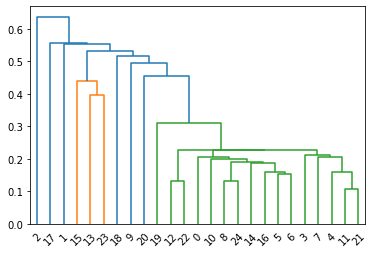

In [8]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))


In [9]:
??AgglomerativeClustering


In [10]:
#"euclidean", "l1", "l2", "manhattan", "cosine", or "precomputed".

#'complete', 'average', 'single'

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')


In [12]:
hc.fit_predict(df_norm)


array([0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [13]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
Univ['h_clusterid'] = y_hc 

In [15]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [16]:
Univ.groupby(["h_clusterid"])["Univ"].apply(lambda x:tuple(x))

h_clusterid
0    (Brown, Columbia, Cornell, Dartmouth, Duke, Ge...
1                      (PennState, Purdue, UWisconsin)
2                                          (TexasA&M,)
3                                           (CalTech,)
4                                               (CMU,)
Name: Univ, dtype: object

# k means

In [17]:
from sklearn.cluster import KMeans

In [18]:
Univ = pd.read_csv("Universities (1).csv")
df_norm = norm_func(Univ.iloc[:,1:])

In [19]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [20]:
model_kmeans.labels_

array([0, 2, 3, 0, 0, 4, 4, 0, 4, 2, 4, 0, 0, 1, 4, 1, 4, 1, 3, 0, 3, 0,
       0, 1, 4])

In [21]:
md=pd.Series(model_kmeans.labels_)

In [22]:
#Complete-linkage clustering - Wikipedia

In [23]:
Univ["labels"]=pd.Series(model_kmeans.labels_)

In [24]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,4
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [25]:
Univ[Univ["Univ"].isin(["PennState","Purdue","UWisconsin"])]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [26]:
Univ.groupby(["labels"])["Univ"].apply(lambda x:tuple(x))

labels
0    (Brown, Columbia, Cornell, Georgetown, Northwe...
1            (PennState, Purdue, TexasA&M, UWisconsin)
2                              (CalTech, JohnsHopkins)
3                         (CMU, UCBerkeley, UMichigan)
4    (Dartmouth, Duke, Harvard, MIT, Princeton, Sta...
Name: Univ, dtype: object

# DBSCAN

In [27]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler




In [28]:
from sklearn.datasets import make_moons
x,y=make_moons(100)
data=pd.DataFrame(x)
data.columns=["f1","f2"]
data["class"]=y
data.head()

,f1,f2,class
0,0.327699,-0.240278,1
1,0.161912,-0.045535,1
2,1.518393,-0.355143,1
3,-0.672301,0.740278,0
4,0.008210,0.372123,1


In [29]:
data.shape

(100, 3)

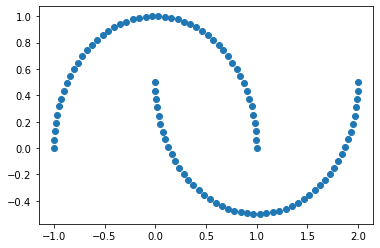

In [30]:
plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)

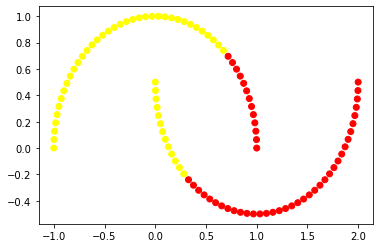

In [31]:
#using kmeans
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
model.fit(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=model.labels_,cmap=plt.cm.autumn)

In [32]:
model.labels_

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

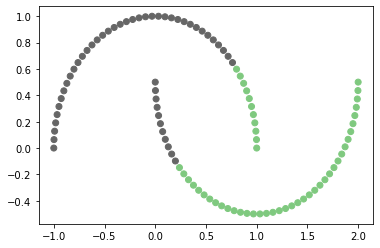

In [33]:
#using hierarchical

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
plt.scatter(data["f1"],data["f2"],c=cluster.fit_predict(data.iloc[:,:2]),cmap=plt.cm.Accent)


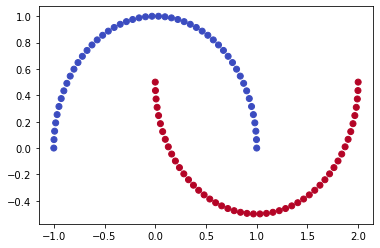

In [34]:
#DBSCAN

dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=claas_pr,cmap=plt.cm.coolwarm_r)



In [35]:
claas_pr

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

 # finding the optimal number of clusters


In [36]:
iris=sns.load_dataset("iris") 

In [37]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
29,4.7,3.2,1.6,0.2,setosa
140,6.7,3.1,5.6,2.4,virginica
42,4.4,3.2,1.3,0.2,setosa
148,6.2,3.4,5.4,2.3,virginica
26,5.0,3.4,1.6,0.4,setosa
73,6.1,2.8,4.7,1.2,versicolor
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
131,7.9,3.8,6.4,2.0,virginica
142,5.8,2.7,5.1,1.9,virginica


In [45]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(iris.iloc[:,:4])
    iner.append(km.inertia_)

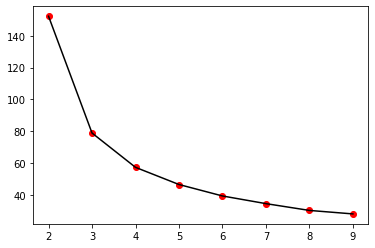

In [46]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# silhouette_score 

In [40]:
from sklearn.metrics import silhouette_score as sil

In [41]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    sc_score.append(sil(iris.iloc[:,:4],y))

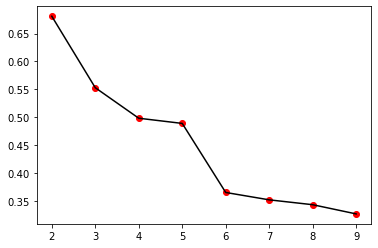

In [42]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

# calinski_harabaz_score

In [43]:
from sklearn.metrics import calinski_harabasz_score

In [44]:
nc=[2,3,4,5,6,7,8,9]
ch_score=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    ch_score.append(chs(iris.iloc[:,:4],y))

NameError: name 'chs' is not defined

In [ ]:
plt.plot(nc,ch_score,color="black")
plt.scatter(nc,ch_score,color="red")
plt.show()